In [42]:
import pycromanager
from pycromanager import Core, Studio
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np

In [43]:
core = Core()
studio = Studio()
studio_data = studio.data()
studio_displays = studio.displays()

In [49]:
store = studio_data.create_rewritable_ram_datastore()
disp = studio_displays.create_display(store)

width, height = 512, 512
bpp = 4
pixels = np.ones((height, width, 4), dtype=np.uint8)
coords = studio_data.coords_builder().build()
meta = studio_data.metadata_builder().build()
img = studio_data.create_image(pixels, width, height, bpp, 3, coords, meta)
store.put_image(img)

In [33]:
if core.is_sequence_running() and studio is not None:
    studio.live().set_live_mode(False)

In [50]:
core.snap_image()

tagged_image = core.get_tagged_image()
tags = OrderedDict(sorted(tagged_image.tags.items()))

pixels = tagged_image.pix
total_pixels = pixels.shape[0]
height, width = tags["Height"], tags["Width"]

assert (total_pixels % (height * width)) == 0

nchannels = total_pixels // (height * width)
if nchannels > 1:
    pixels = pixels.reshape(height, width, nchannels)
else:
    pixels = pixels.reshape(height, width)
    
if nchannels > 1:
    pixels = pixels[:, :, ::-1]  # BGRA to ARGB
    pixels = pixels[:, :, 1:]  # Remove alpha channel
pixels.shape, pixels.mean()

((1544, 2064, 3), np.float64(35.2371088677016))

In [58]:
pixelsx = np.concatenate([pixels, np.zeros_like(pixels[:,:,0])[:,:,np.newaxis]], axis=2)  # Add alpha channel back
pixelsx.shape


(1544, 2064, 4)

In [61]:
store = studio_data.create_rewritable_ram_datastore()
disp = studio_displays.create_display(store)

height, width = 1544, 2064
bpp = 4
#pixels = np.ones((height, width, 4), dtype=np.uint8)
coords = studio_data.coords_builder().build()
meta = studio_data.metadata_builder().build()
img = studio_data.create_image(pixelsx, width, height, bpp, 3, coords, meta)
store.put_image(img)

In [ ]:
height, width = 1544, 2064
bpp = 4
#pixels = np.ones((height, width, 4), dtype=np.uint8)
coords = studio_data.coords_builder().build()
meta = studio_data.metadata_builder().build()
img = studio_data.create_image(pixelsx, width, height, bpp, 3, coords, meta)
store.put_image(img)

In [64]:
live_window = studio.live()

In [ ]:
live_window.

In [65]:
#dir(live_window)

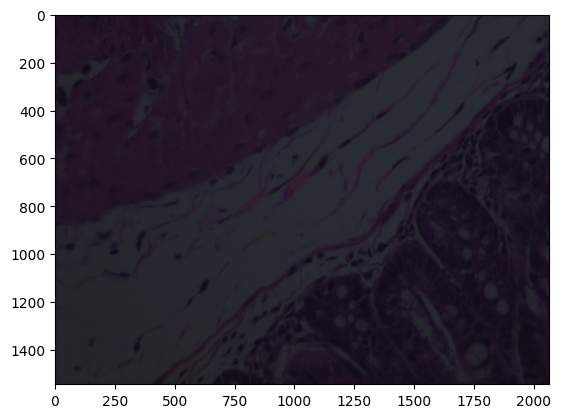

In [32]:
plt.imshow(pixels)